In [7]:
import numpy as np
import networkx as nx

[[[ 4.47532082 -0.86384761]
  [ 4.47532082 -0.28133079]
  [ 4.47532082  0.33736864]
  [ 4.47532082  0.91173166]
  [ 4.47532082  1.53860676]]

 [[ 5.11825323 -0.86384761]
  [ 5.11825323 -0.28133079]
  [ 5.11825323  0.33736864]
  [ 5.11825323  0.91173166]
  [ 5.11825323  1.53860676]]

 [[ 5.6751194  -0.86384761]
  [ 5.6751194  -0.28133079]
  [ 5.6751194   0.33736864]
  [ 5.6751194   0.91173166]
  [ 5.6751194   1.53860676]]

 [[ 6.30232954 -0.86384761]
  [ 6.30232954 -0.28133079]
  [ 6.30232954  0.33736864]
  [ 6.30232954  0.91173166]
  [ 6.30232954  1.53860676]]]


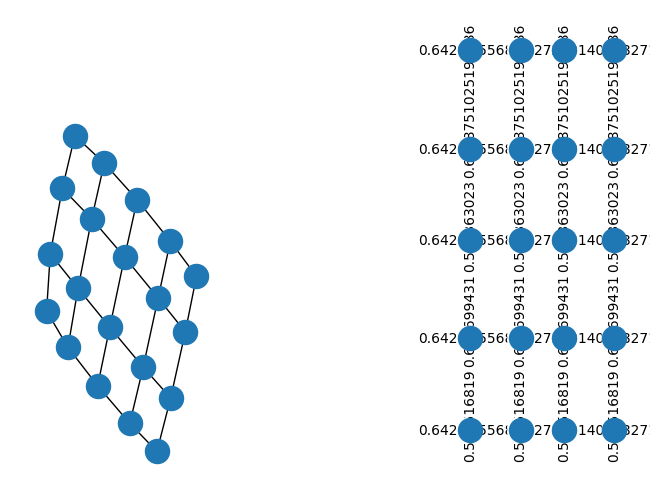

In [17]:
x_range = [4.475320816040039, 5.118253231048584, 5.675119400024414, 6.3023295402526855]
y_range = [-0.8638476133346558, -0.28133079409599304,  0.3373686373233795, 0.9117316603660583, 1.538606762886047]

nodes = list()

for x in x_range:
    node_row = list()
    for y in y_range:
        node_row.append([x,y])
    nodes.append(node_row)

grid = np.array(nodes)

print(grid)

G = nx.Graph()

def get_node_num(i, j):
    return j * grid.shape[0] + i

def get_node_weight(i1, j1, i2, j2):
    return np.linalg.norm(grid[i1][j1] - grid[i2][j2])

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        G.add_node(j * grid.shape[0] + i, pos=grid[i,j])

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        
        # i, j is next to
        # i + 1, j
        # i - 1, j
        # i, j + 1
        # i, j - 1

        if i + 1 < grid.shape[0]:
            G.add_edge(get_node_num(i, j), get_node_num(i + 1, j), weight=get_node_weight(i, j, i + 1, j))
        if j + 1 < grid.shape[1]:
            G.add_edge(get_node_num(i, j), get_node_num(i, j + 1), weight=get_node_weight(i, j, i, j + 1))

pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)   
nx.draw(G)